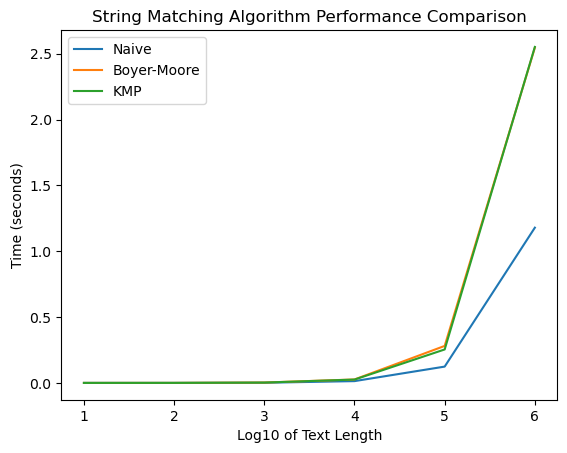

In [3]:
import time
import matplotlib.pyplot as plt
import numpy as np

# Naive String Matching
def naive_string_match(text, pattern):
    occurrences = []
    n, m = len(text), len(pattern)
    for i in range(n - m + 1):
        if text[i:i+m] == pattern:
            occurrences.append(i)
    return occurrences

# Boyer-Moore String Matching
def boyer_moore_string_match(text, pattern):
    occurrences = []
    n, m = len(text), len(pattern)
    skip = {ch: m for ch in pattern}
    i = 0
    while i <= n - m:
        j = m - 1
        while j >= 0 and text[i + j] == pattern[j]:
            j -= 1
        if j < 0:
            occurrences.append(i)
            i += 1
        else:
            i += max(1, j - skip.get(text[i + j], -1))
    return occurrences

# Knuth-Morris-Pratt (KMP) String Matching
def kmp_string_match(text, pattern):
    def build_lps(pattern):
        m = len(pattern)
        lps = [0] * m
        j = 0
        for i in range(1, m):
            while j > 0 and pattern[i] != pattern[j]:
                j = lps[j - 1]
            if pattern[i] == pattern[j]:
                j += 1
            lps[i] = j
        return lps

    occurrences = []
    n, m = len(text), len(pattern)
    lps = build_lps(pattern)
    i = j = 0
    while i < n:
        if pattern[j] == text[i]:
            i += 1
            j += 1
        if j == m:
            occurrences.append(i - j)
            j = lps[j - 1]
        elif i < n and pattern[j] != text[i]:
            if j != 0:
                j = lps[j - 1]
            else:
                i += 1
    return occurrences

# Performance Comparison
def compare_string_matching_algorithms():
    text = "ABABDABACDABABCABAB"
    pattern = "ABABCABAB"
    repetitions = [10**i for i in range(1, 7)]

    naive_times = []
    bm_times = []
    kmp_times = []

    for rep in repetitions:
        text_large = text * rep
        start_time = time.time()
        naive_string_match(text_large, pattern)
        naive_times.append(time.time() - start_time)

        start_time = time.time()
        boyer_moore_string_match(text_large, pattern)
        bm_times.append(time.time() - start_time)

        start_time = time.time()
        kmp_string_match(text_large, pattern)
        kmp_times.append(time.time() - start_time)

    plt.plot(np.log10(repetitions), naive_times, label='Naive')
    plt.plot(np.log10(repetitions), bm_times, label='Boyer-Moore')
    plt.plot(np.log10(repetitions), kmp_times, label='KMP')
    plt.xlabel('Log10 of Text Length')
    plt.ylabel('Time (seconds)')
    plt.legend()
    plt.title('String Matching Algorithm Performance Comparison')
    plt.show()

# Run the comparison
compare_string_matching_algorithms()
